# Data Preparation

In [2]:
import spacy
import os
import pandas as pd
#from __future__ import division

In [17]:
def extract_articles(path):
#rootdir = 
    cat_article=[]
    for subdir, dirs, files in os.walk(path):
        print(subdir)    
        for file in files:#iterate over files with .txt extension
            if '.txt' in file:      
                category= subdir.split('/')[-1]
                #print(category)
                f=open(os.path.join(subdir, file),'r',errors='ignore')
                lines=f.readlines()
                lines=' '.join(lines).replace('\n','')
                cat_article.append([category,lines])
                f.close()
                
    data=pd.DataFrame(cat_article)
    data.columns=['category','article']

    return data

In [14]:
extract_articles('Data')

Data
Data/business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business
business


Data/sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport
sport

In [18]:
data=extract_articles('Data')

Data
Data/business
Data/entertainment
Data/politics
Data/sport
Data/tech


In [ ]:
pd.set_option('display.max_colwidth', -1)

In [31]:
data[data['category']=='tech'].head(3)
#data.groupby('category').size()

,category,article
1824,tech,"Ink helps drive democracy in Asia The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting. This new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as ""an island of democracy"", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision. The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embassy, the Soros Foundation and the Kyrgyz government have all contributed to purchase transparent ballot boxes. The actual technology behind the ink is not that complicated. The ink is sprayed on a person's left thumb. It dries and is not visible under normal light. However, the presence of ultraviolet light (of the kind used to verify money) causes the ink to glow with a neon yellow light. At the entrance to each polling station, one election official will scan voter's fingers with UV lamp before allowing them to enter, and every voter will have his/her left thumb sprayed with ink before receiving the ballot. If the ink shows under the UV light the voter will not be allowed to enter the polling station. Likewise, any voter who refuses to be inked will not receive the ballot. These elections are assuming even greater significance because of two large factors - the upcoming parliamentary elections are a prelude to a potentially regime changing presidential election in the Autumn as well as the echo of recent elections in other former Soviet Republics, notably Ukraine and Georgia. The use of ink has been controversial - especially among groups perceived to be pro-government. Widely circulated articles compared the use of ink to the rural practice of marking sheep - a still common metaphor in this primarily agricultural society. The author of one such article began a petition drive against the use of the ink. The greatest part of the opposition to ink has often been sheer ignorance. Local newspapers have carried stories that the ink is harmful, radioactive or even that the ultraviolet readers may cause health problems. Others, such as the aggressively middle of the road, Coalition of Non-governmental Organizations, have lauded the move as an important step forward. This type of ink has been used in many elections in the world, in countries as varied as Serbia, South Africa, Indonesia and Turkey. The other common type of ink in elections is indelible visible ink - but as the elections in Afghanistan showed, improper use of this type of ink can cause additional problems. The use of ""invisible"" ink is not without its own problems. In most elections, numerous rumors have spread about it. In Serbia, for example, both Christian and Islamic leaders assured their populations that its use was not contrary to religion. Other rumours are associated with how to remove the ink - various soft drinks, solvents and cleaning products are put forward. However, in reality, the ink is very effective at getting under the cuticle of the thumb and difficult to wash off. The ink stays on the finger for at least 72 hours and for up to a week. The use of ink and readers by itself is not a panacea for election ills. The passage of the inking law is, nevertheless, a clear step forward towards free and fair elections."" The country's widely watched parliamentary elections are scheduled for 27 February. David Mikosz works for the IFES, an international, non-pro

In [26]:
data['article'] = data['article'].apply(lambda x: x.decode('utf-8','ignore'))

AttributeError: 'str' object has no attribute 'decode'

In [33]:
# we load english language to use spacy library and define functions that help us tokenize, 
# lemmatize the words of the articles and remove stop words.

nlp = spacy.load("en_core_web_sm")

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    return token.is_punct or token.is_space

def lemmatize(doc):
    """
    function that tokenize the text, lemmatizes it and removes stop words.
    """
    parsed_doc=nlp(doc)
    lemm_doc = [token.lemma_ for token in parsed_doc
                      if not punct_space(token) and (token.lemma_!= '-PRON-') and not(nlp.vocab[token.text].is_stop)]
      
    # write the transformed text
    clean_text = u' '.join(lemm_doc)
    return clean_text

In [34]:
# we apply the lemmatization to all articles
data['article_lemmatized']=data.article.map(lemmatize)

In [35]:
data[data['category']=='tech'].head(1)

,category,article,article_lemmatized
1824,tech,"Ink helps drive democracy in Asia The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting. This new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as ""an island of democracy"", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision. The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embassy, the Soros Foundation and the Kyrgyz government have all contributed to purchase transparent ballot boxes. The actual technology behind the ink is not that complicated. The ink is sprayed on a person's left thumb. It dries and is not visible under normal light. However, the presence of ultraviolet light (of the kind used to verify money) causes the ink to glow with a neon yellow light. At the entrance to each polling station, one election official will scan voter's fingers with UV lamp before allowing them to enter, and every voter will have his/her left thumb sprayed with ink before receiving the ballot. If the ink shows under the UV light the voter will not be allowed to enter the polling station. Likewise, any voter who refuses to be inked will not receive the ballot. These elections are assuming even greater significance because of two large factors - the upcoming parliamentary elections are a prelude to a potentially regime changing presidential election in the Autumn as well as the echo of recent elections in other former Soviet Republics, notably Ukraine and Georgia. The use of ink has been controversial - especially among groups perceived to be pro-government. Widely circulated articles compared the use of ink to the rural practice of marking sheep - a still common metaphor in this primarily agricultural society. The author of one such article began a petition drive against the use of the ink. The greatest part of the opposition to ink has often been sheer ignorance. Local newspapers have carried stories that the ink is harmful, radioactive or even that the ultraviolet readers may cause health problems. Others, such as the aggressively middle of the road, Coalition of Non-governmental Organizations, have lauded the move as an important step forward. This type of ink has been used in many elections in the world, in countries as varied as Serbia, South Africa, Indonesia and Turkey. The other common type of ink in elections is indelible visible ink - but as the elections in Afghanistan showed, improper use of this type of ink can cause additional problems. The use of ""invisible"" ink is not without its own problems. In most elections, numerous rumors have spread about it. In Serbia, for example, both Christian and Islamic leaders assured their populations that its use was not contrary to religion. Other rumours are associated with how to remove the ink - various soft drinks, solvents and cleaning products are put forward. However, in reality, the ink is very effective at getting under the cuticle of the thumb and difficult to wash off. The ink stays on the finger for at least 72 hours and for up to a week. The use of ink and readers by itself is not a panacea for election ills. The passage of the inking law is, nevertheless, a clear step forward towards free and fair elections."" The country's widely watched parliamentary elections are scheduled for 27 February. David Mikosz works for the IFES, an int

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [37]:
data['article_lemmatized'].shape

(2225,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data['article_lemmatized'], data['category'], test_size=0.4, random_state=42)
print ("size of training",len(X_train))
print ("size of test",len(X_test))

size of training 1335
size of test 890


In [86]:
X_test.head(1)
#X_test.groupby(by='article_lemmatized')

414    UK house price dip November UK house price dip slightly November Office Deputy Prime Minister ODPM say average house price fall marginally £ 180,226 £ 180,444 October recent evidence suggest UK housing market slow interest rate increase economist forecast drop price 2005 monthly figure hint cooling market annual house price inflation strong 13.8 year November economist forecast ODPM figure likely weakening annual house price growth come month overall housing market activity slow back mortgage lending mortgage approval datum say Mark Miller HBOS Treasury Services ODPM datum fairly lagging indicator figure come Bank England say number mortgage approve UK fall low level nearly decade Halifax say week house price increase 1.1 December monthly rise September UK big mortgage lender say price rise 15.1 2004 2.8 second half year predict 2 fall overall price 2005 market stabilise large gain recent year ODPM attribute monthly fall price November drop value detach house flat say annual inf

In [93]:
type(X_test)
X_test.name
pd.concat([X_test, y_test], axis=1).groupby(by='category').count()

,article_lemmatized
category,
business,213
entertainment,154
politics,159
sport,200
tech,164


In [95]:
#y_test.groupby('category').count()

'category'

# Feature Engineering

In [40]:
cvec = CountVectorizer(stop_words='english', min_df=3)#exclude the words that appears less than 3 times.
# we create a matrix for the training set
cvec.fit(X_train)
cvec_counts_train = cvec.transform(X_train)
# we create a matrix for the test set
cvec_counts_test=cvec.transform(X_test)

In [47]:
vals = cvec_counts_train.toarray()
cols = cvec.get_feature_names()
cols[0:3]

['00', '000', '007']

In [55]:
df = pd.DataFrame(vals[:,:3], columns = cols[0:3])
df.head()

,00,000,007
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [60]:
data.iloc[[3]]

,category,article,article_lemmatized
3,business,"High fuel prices hit BA's profits British Airways has blamed high fuel prices for a 40% drop in profits. Reporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of £75m ($141m) compared with £125m a year earlier. Rod Eddington, BA's chief executive, said the results were ""respectable"" in a third quarter when fuel costs rose by £106m or 47.3%. BA's profits were still better than market expectation of £59m, and it expects a rise in full-year revenues. To help offset the increased price of aviation fuel, BA last year introduced a fuel surcharge for passengers. In October, it increased this from £6 to £10 one-way for all long-haul flights, while the short-haul surcharge was raised from £2.50 to £4 a leg. Yet aviation analyst Mike Powell of Dresdner Kleinwort Wasserstein says BA's estimated annual surcharge revenues - £160m - will still be way short of its additional fuel costs - a predicted extra £250m. Turnover for the quarter was up 4.3% to £1.97bn, further benefiting from a rise in cargo revenue. Looking ahead to its full year results to March 2005, BA warned that yields - average revenues per passenger - were expected to decline as it continues to lower prices in the face of competition from low-cost carriers. However, it said sales would be better than previously forecast. ""For the year to March 2005, the total revenue outlook is slightly better than previous guidance with a 3% to 3.5% improvement anticipated,"" BA chairman Martin Broughton said. BA had previously forecast a 2% to 3% rise in full-year revenue. It also reported on Friday that passenger numbers rose 8.1% in January. Aviation analyst Nick Van den Brul of BNP Paribas described BA's latest quarterly results as ""pretty modest"". ""It is quite good on the revenue side and it shows the impact of fuel surcharges and a positive cargo development, however, operating margins down and cost impact of fuel are very strong,"" he said. Since the 11 September 2001 attacks in the United States, BA has cut 13,000 jobs as part of a major cost-cutting drive. ""Our focus remains on reducing controllable costs and debt whilst continuing to invest in our products,"" Mr Eddington said. ""For example, we have taken delivery of six Airbus A321 aircraft and next month we will start further improvements to our Club World flat beds."" BA's shares closed up four pence at 274.5 pence.","high fuel price hit BA profit British Airways blame high fuel price 40 drop profit report result month 31 December 2004 airline pre tax profit £ 75 m $ 141 m compare £ 125 m year early Rod Eddington BA chief executive say result respectable quarter fuel cost rise £ 106 m 47.3 BA profit well market expectation £ 59 m expect rise year revenue help offset increase price aviation fuel BA year introduce fuel surcharge passenger October increase £ 6 £ 10 way long haul flight short haul surcharge raise £ 2.50 £ 4 leg aviation analyst Mike Powell Dresdner Kleinwort Wasserstein say BA estimate annual surcharge revenue £ 160 m way short additional fuel cost predict extra £ 250 m. turnover quarter 4.3 £ 1.97bn benefit rise cargo revenue look ahead year result March 2005 BA warn yield average revenue passenger expect decline continue lower price face competition low cost carrier say sale well previously forecast year March 2005 total revenue outlook slightly well previous guidance 3 3.5 improvement anticipate BA chairman Martin Broughton say BA previously forecast 2 3 rise year revenue report Friday passenger number rise 8.1 January aviation analyst Nick Van den Brul BNP Paribas describe BA late quarterly result pretty modest good revenue show impact fuel surcharge positive cargo development operate margin cost impact fuel strong say 11 September 2001 attack United States BA cut 13,000 job major cost cut drive focus remain reduce controllable cost debt whilst continue invest product Mr Eddington say example take delivery Airbus

In [62]:
print ('sparse matrix shape:', cvec_counts_train.shape)
print ('nonzero count:', cvec_counts_train.nnz)
print ('sparsity: %.2f%%' % (100.0 * (cvec_counts_train.nnz / (cvec_counts_train.shape[0] * cvec_counts_train.shape[1]))))

sparse matrix shape: (1335, 7599)
nonzero count: 161752
sparsity: 1.59%


# Training

In [63]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics

# training
clf = RandomForestClassifier().fit(cvec_counts_train, y_train)

# testing
predicted=clf.predict(cvec_counts_test)

In [64]:
metrics.accuracy_score(y_test, predicted)

0.9640449438202248

In [66]:
print(metrics.classification_report(y_test, predicted))

               precision    recall  f1-score   support

     business       0.94      0.97      0.95       213
entertainment       0.99      0.94      0.97       154
     politics       0.96      0.94      0.95       159
        sport       0.97      1.00      0.99       200
         tech       0.96      0.96      0.96       164

     accuracy                           0.96       890
    macro avg       0.97      0.96      0.96       890
 weighted avg       0.96      0.96      0.96       890



In [67]:
metrics.confusion_matrix(y_test,predicted)

array([[206,   0,   4,   0,   3],
       [  3, 145,   2,   2,   2],
       [  6,   0, 150,   2,   1],
       [  0,   0,   0, 200,   0],
       [  4,   1,   0,   2, 157]])

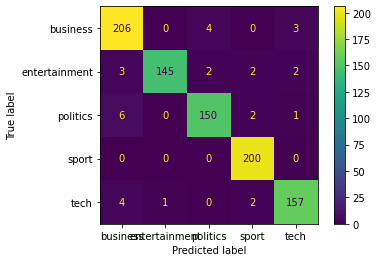

In [71]:
metrics.plot_confusion_matrix(clf, cvec_counts_test, y_test)
#falsos negativos (horizontal)
#Falsos positivos (vertical)

In [ ]:
200/(200+0)=1.0
200/(206)=.97